## Librerias

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Problema

Para el siguiente problema se puede guiar del siguiente notebook [gradiente descendiente](https://github.com/diegour1/CompMetodosComputacionales/blob/main/Notebooks/08%20-%20Gradient_Descent_Neural_Networks.ipynb)

Considere el potencial electrico entre dos cargas de la misma magnitud pero de signo opuesto medido en la posición $\vec{r}$ desde el centro de coordenadas dado por,

$$ V(\vec{r}) = \frac{q}{4\pi \epsilon_0}\Bigg[\frac{1}{|\vec{r}-\vec{r_+}|}-\frac{1}{|\vec{r}-\vec{r_-}|}\Bigg], $$

donde $\vec{r_+}$, y $\vec{r_-}$, son las posiciones de las cargas positivas y negativas respectivamente. En este ejercicio solamente nos vamos a enfocar en las dimensiones $x$ y $y$.

Dados los siguientes parametros, 

$$\vec{r_+} = (-0.25\text{ m}, 0), \quad \vec{r_-} = (0.25\text{ m}, 0), \quad \frac{q}{4\pi \epsilon_0} = 1, $$

y que el campo electrico está dado por, 

$$\vec{E}(\vec{r}) = -\vec{\nabla} V(\vec{r}),$$

a) Escriba la función potencial en términos de $x$ y $y$ e imprima los valores del potencial en el punto $(x, y) = (0, 0)$ y $(x, y) = (0.1, 0)$, $(x, y) = (-0.15, 0.12)$.

In [3]:
def Potential(x, y):
    ## tu código aquí
    r_mas=np.array([0.25,0])
    r_menos=np.array([-0.25,0])
    r=np.array([x,y])
    funcion= 1/(np.linalg.norm(r-r_menos))-1/(np.linalg.norm(r-r_mas))
    return funcion 
# codigo para verificar su resultado no modificar
Potential(0, 0), Potential(0.1, 0), Potential(-0.15, 0.12)

(0.0, -3.8095238095238098, 4.007278283591919)

b) Calcule la gradiente del potencial, con la formula de derivada central.

In [10]:
def Gradient_xy(f, x, y, h): 
    grad = np.array([0., 0.])
    # su codigo aqui
    
    derivada_central_x= (f(x+h,y)-f(x-h,y))/(2*h)
    derivada_central_y= (f(x,y+h)-f(x,y-h))/(2*h)
    grad[0]=derivada_central_x
    grad[1]=derivada_central_y
    return grad

# codigo para verificar su resultado no modificar
Gradient_xy(Potential, 0, 0, 0.0001), Gradient_xy(Potential, 0.1, 0.05, 0.0001), Gradient_xy(Potential, -0.15, 0.12, 0.0001)

(array([-32.00000512,   0.        ]),
 array([-45.86693986,  11.5177336 ]),
 array([-31.72918389, -29.83684152]))

c) Empezando en el punto $(x, y) = (0, 0.15)$ implemente el algoritmo de gradiente descendiente. Con pasos 683 pasos de $e = 0.0001$ para el gradiente descendiente y $h = 0.0001$ para la derivada central. Guarde la trayectoria en la variable `trayectory`

El algoritmo gradiente descendiente tiene la siguiente forma



```
loss_function := Potential function that you wish to minimize
min_value := initial_value
e := the step size of the gradient descent
num_steps := num of times that the GD looks for the minima


for i in range(num_steps)
  min_value = min_value - e * grad_loss_function(min_value)
```

Puede seguir el siguiente [notebook](https://github.com/diegour1/CompMetodosComputacionales/blob/main/Notebooks/08%20-%20Gradient_Descent_Neural_Networks.ipynb)




In [14]:
trayectory = []
# su codigo aqui
num_steps=680
min_value=np.array([0,0.15])
h=1e-4
e=0.00001
for i in range(num_steps):
    min_value = min_value - e * Gradient_xy(Potential,min_value[0],min_value[1],h)
    trayectory.append(min_value)
# codigo para verificar su resultado no modificar
print(trayectory[-1])

[0.22671271 0.02278046]


d) Gráfique con la misma escala en x y y, las dos cargas y la trayectoria.

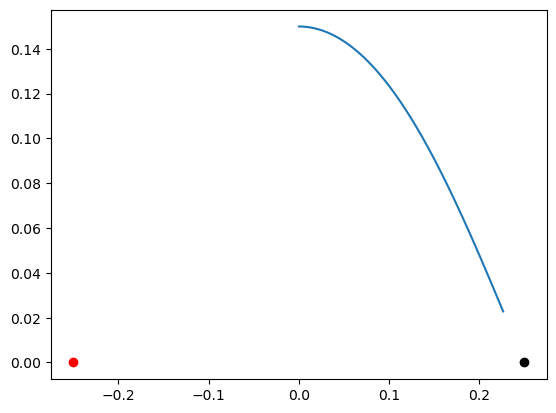

In [51]:
# su codigo aqui
trayectory=np.array(trayectory)
X=trayectory[:,0]
Y=trayectory[:,1]


#draw.plot(r_mas, marker="o", color="red")
plt.plot(-0.25,0,marker ="o",color='red')
plt.plot(0.25,0, marker='o', color='black')
plt.plot(X,Y)


e) ¿Qué significa físicamente la trayectoria?

 
 La trayectoria de una particula positiva hacía otra particula negativa fija, y que a su vez esta siendo afectada por el campo eléctrico de la carga $q+$ y $-q$, siendo la trayectoria mostrada la linea de campo de q+ a q- desde el origen hasta -q.